<a href="https://colab.research.google.com/github/Pakhi27/DS304_LabAssignment3_22bds042--Movielens-100k-Dataset-/blob/main/DS304_LabAssignment3_22bds042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [10]:
import pandas as pd

# Assuming your data path is "/content/drive/MyDrive/ml-100k/ml-100k" (replace if different)
data_path = "/content/drive/MyDrive/ml-100k/ml-100k"

# Read u.item file (optional)
try:
  movie_info = pd.read_csv(data_path + "/u.item", sep="|", encoding="ISO-8859-1", header=None, names=["movie_id", "title", "release_date", "video_release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
  # # Extract title before year in parenthesis (optional)
  # movie_info["title"] = movie_info["title"].str.split(" (").str[0]
except FileNotFoundError:
  print("u.item file not found. Skipping movie information.")
  movie_info = None

# Read u.data file
try:
  ratings = pd.read_csv(data_path + "/u.data", sep="\t", header=None, names=["user_id", "movie_id", "rating", "timestamp"])  # Specify delimiter, no header, and column names
except FileNotFoundError:
  print("u.data file not found. Skipping ratings data.")
  ratings = None

# Read u.user file (optional)
try:
  user_info = pd.read_csv(data_path + "/u.user", sep="|", encoding="ISO-8859-1", header=None, names=["user_id", "age", "gender", "occupation", "zip_code"])  # Specify delimiter, no header, and column names
except FileNotFoundError:
  print("u.user file not found. Skipping user information.")
  user_info = None

# Now you have access to the dataframes (if files were found)
if ratings is not None:
  print("Ratings data loaded successfully!")
  print(ratings.head())  # Display the first few rows

if movie_info is not None:
  print("Movie information loaded successfully!")
  print(movie_info.head())  # Display the first few rows

if user_info is not None:
  print("User information loaded successfully!")
  print(user_info.head())  # Display the first few rows

Ratings data loaded successfully!
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
Movie information loaded successfully!
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0    

In [13]:
df=pd.DataFrame(movie_info)
df_1=pd.DataFrame(ratings)
df_2=pd.DataFrame(user_info)

In [15]:
merged_df = pd.merge(ratings, movie_info, on='movie_id')
merged_df = pd.merge(merged_df, user_info, on='user_id')

In [16]:
merged_df

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,49,M,writer,55105
1,196,257,2,881251577,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,0,0,1,0,0,0,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,1,0,0,0,0,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,0,0,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,0,0,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,891392177,Titanic (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,0,1,...,0,1,0,0,0,0,48,F,administrator,33763
99996,873,326,4,891392656,G.I. Jane (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?G%2EI%2E+Jane...,0,1,...,0,0,0,0,1,0,48,F,administrator,33763
99997,873,348,3,891392577,Desperate Measures (1998),30-Jan-1998,NaN,http://us.imdb.com/Title?Desperate+Measures+(1...,0,0,...,0,0,0,1,0,0,48,F,administrator,33763
99998,873,358,2,891392698,Spawn (1997),01-Aug-1997,NaN,http://us.imdb.com/M/title-exact?Spawn+(1997/I),0,1,...,0,0,1,1,0,0,48,F,administrator,33763


In [24]:
# average rating for each movie genre
# Filter for Action movies
action_movies = merged_df[merged_df['Action'] == 1]

# Calculate average rating for each Action movie
avg_ratings_action = action_movies.groupby('movie_id')['rating'].mean()

# Calculate overall average rating for Action movies
avg_rating_action = avg_ratings_action.mean()

print("Average rating for Action movies:", avg_rating_action)

Average rating for Action movies: 2.9663324037589853


             Average Rating
Action             2.966332
Adventure          3.143967
Animation          3.298813
Children's         2.916885
Comedy             3.000565
Crime              3.211015
Documentary        3.229273
Drama              3.187353
Fantasy            2.849830
Film-Noir          3.548351
Horror             2.730157
Musical            3.376423
Mystery            3.336814
Romance            3.244049
Sci-Fi             3.165446
Thriller           3.136692
War                3.489185
Western            3.185617


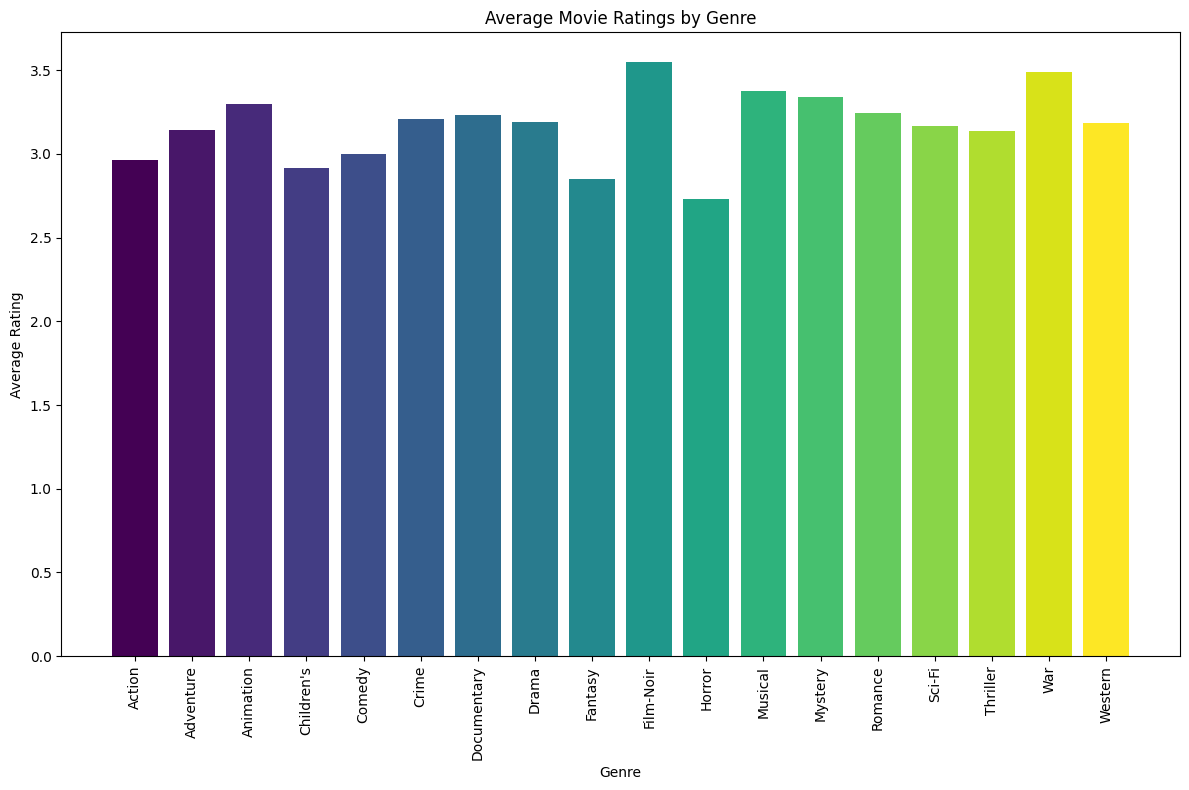

In [73]:
import pandas as pd

# Assuming the genre columns are in the DataFrame
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate average ratings for each genre
avg_ratings = {}
for genre in genre_columns:
  genre_movies = merged_df[merged_df[genre] == 1]
  avg_rating = genre_movies.groupby('movie_id')['rating'].mean().mean()
  avg_ratings[genre] = avg_rating

# Create a DataFrame from the results
avg_ratings_df = pd.DataFrame.from_dict(avg_ratings, orient='index', columns=['Average Rating'])

print(avg_ratings_df)

import matplotlib.pyplot as plt
import numpy as np

# Assuming avg_ratings_df is already created
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_ratings_df)))

# Plotting the vertical bar chart with different colors for each genre
plt.figure(figsize=(12, 8))
bars = plt.bar(avg_ratings_df.index, avg_ratings_df['Average Rating'], color=colors)

# Adding titles and labels
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()




In [28]:
merged_df["Action"].value_counts()

,count
Action,
0,74411
1,25589


             Rating Count
Drama               39895
Comedy              29832
Action              25589
Thriller            21872
Romance             19461
Adventure           13753
Sci-Fi              12730
War                  9398
Crime                8055
Children's           7182
Horror               5317
Mystery              5245
Musical              4954
Animation            3605
Western              1854
Film-Noir            1733
Fantasy              1352
Documentary           758


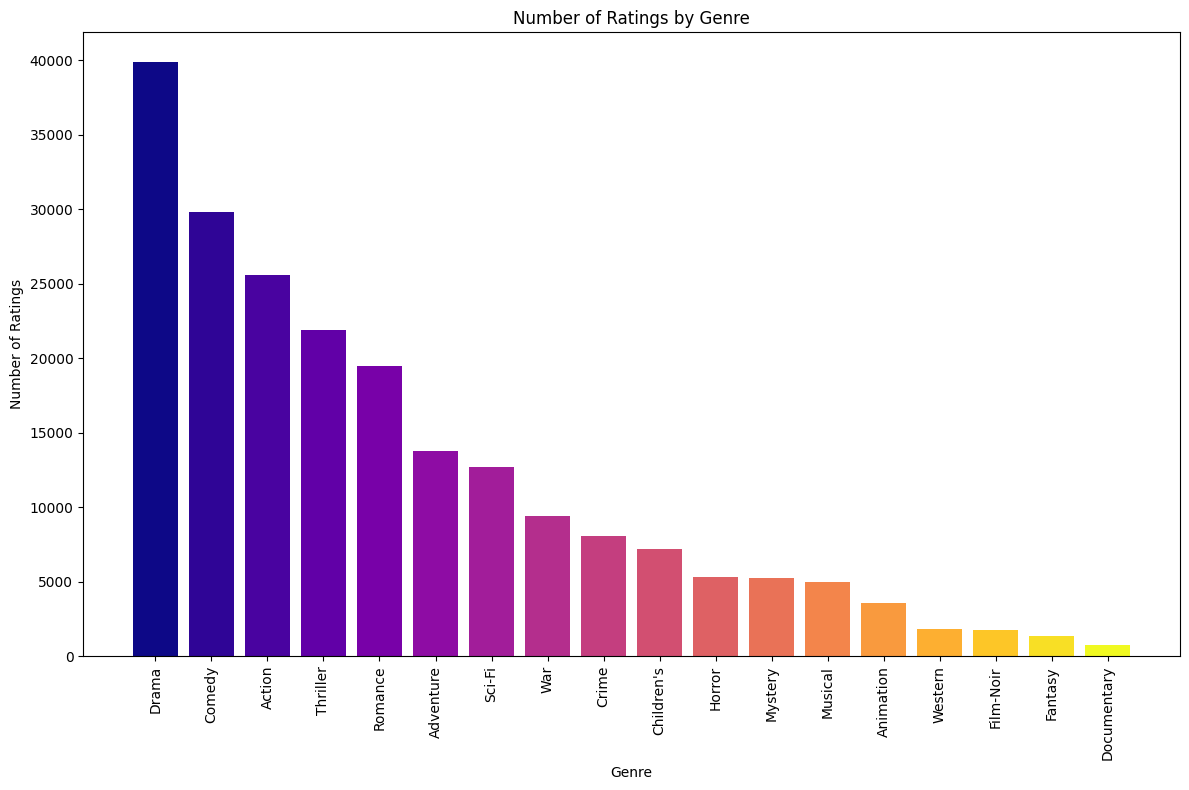

In [74]:
# genres are the most popular based on the number of ratings received?
import pandas as pd

# Assuming the genre columns are in the DataFrame
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Count ratings for each genre
genre_counts = {}
for genre in genre_columns:
  genre_ratings = merged_df[merged_df[genre] == 1]['rating']
  genre_counts[genre] = genre_ratings.count()

# Create a DataFrame from the results
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Rating Count'])

# Sort by rating count in descending order
genre_counts_df = genre_counts_df.sort_values(by='Rating Count', ascending=False)

print(genre_counts_df)
import matplotlib.pyplot as plt
import numpy as np

# Assuming genre_counts_df is already created and sorted by rating count
# Create a colormap
colors = plt.cm.plasma(np.linspace(0, 1, len(genre_counts_df)))

# Plotting the vertical bar chart with different colors for each genre
plt.figure(figsize=(12, 8))
bars = plt.bar(genre_counts_df.index, genre_counts_df['Rating Count'], color=colors)

# Adding titles and labels
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()



movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: rating, dtype: int64


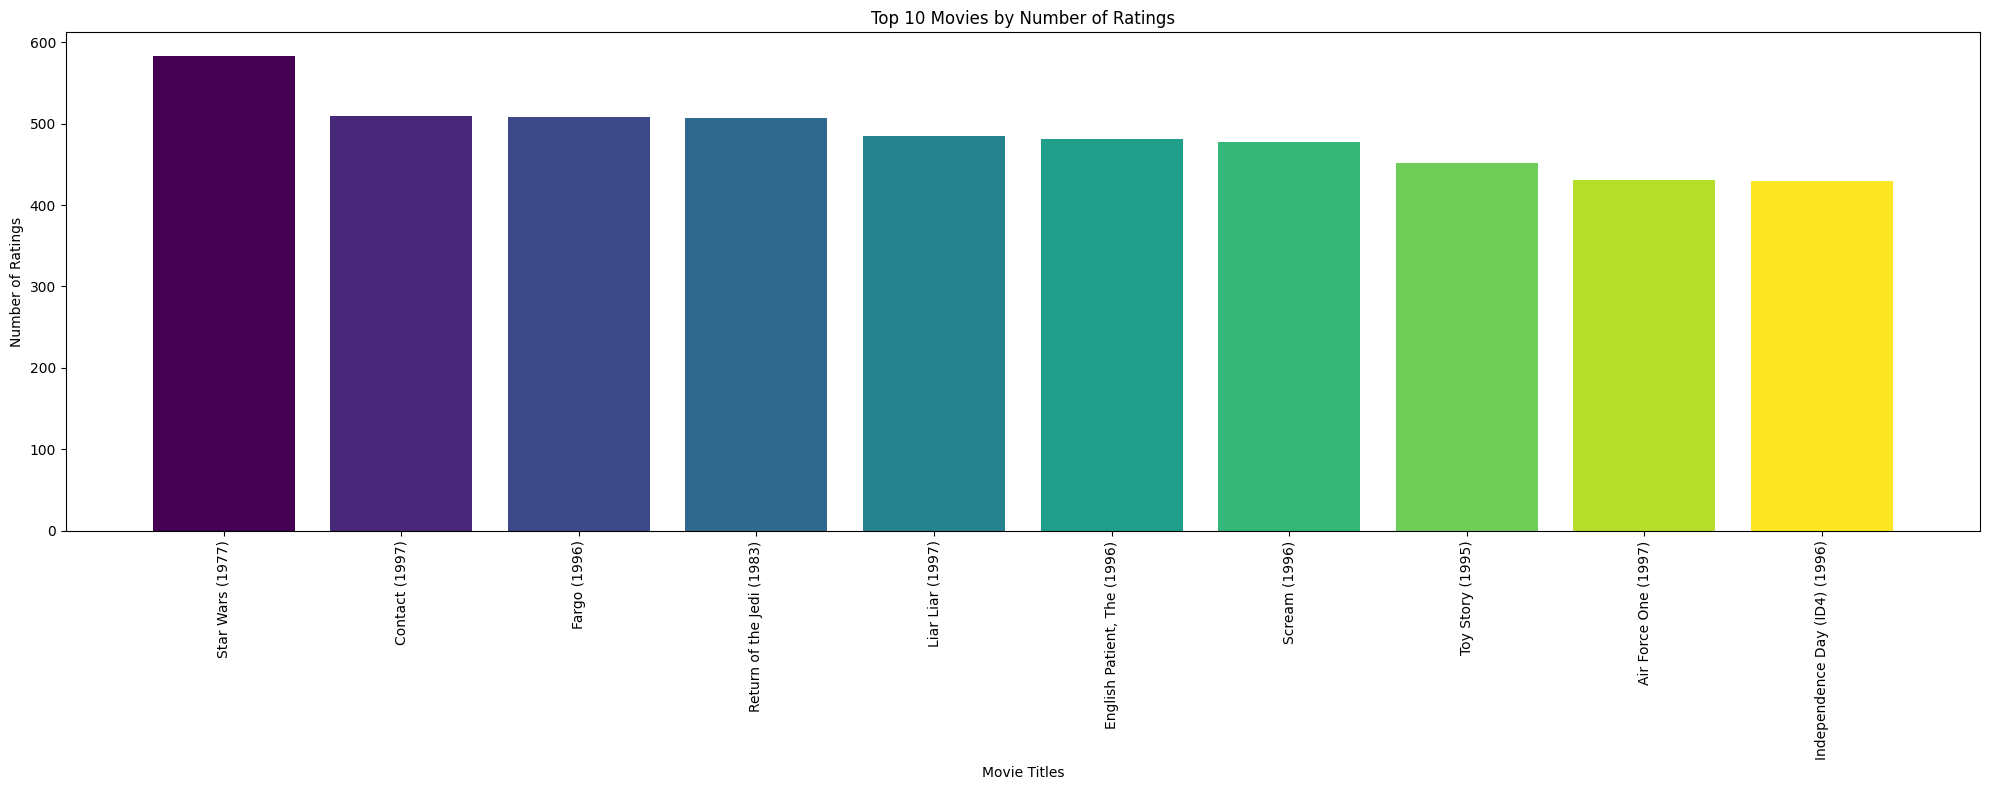

In [75]:
# Movies (Top-10) that have received the highest number of ratings

# Count ratings for each movie
movie_ratings = merged_df.groupby('movie_id')['rating'].count()

# Sort by rating count in descending order
movie_ratings_sorted = movie_ratings.sort_values(ascending=False)

# Get the top 10 movies
top_10_movies = movie_ratings_sorted.head(10)

print(top_10_movies)
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'merged_df' has a 'movie_id' column and a corresponding 'movie_title' column
# Map movie titles to the top 10 movie IDs
top_10_movie_titles = merged_df[merged_df['movie_id'].isin(top_10_movies.index)][['movie_id', 'title']].drop_duplicates().set_index('movie_id').loc[top_10_movies.index]['title']

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_movies)))

# Plotting the vertical bar chart with different colors for each movie
plt.figure(figsize=(20, 8))
plt.bar(top_10_movie_titles, top_10_movies, color=colors)

# Adding titles and labels
plt.xlabel('Movie Titles')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Movies by Number of Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()




In [33]:
print(merged_df.columns.tolist())  # List all column names in the DataFrame

['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'age', 'gender', 'occupation', 'zip_code']


Genre: Action
Male Average Rating: 0.27130352814435765
Female Average Rating: 0.2114219114219114
-----------------------------------
Genre: Adventure
Male Average Rating: 0.14290331268516024
Female Average Rating: 0.12202797202797203
-----------------------------------
Genre: Animation
Male Average Rating: 0.03514678157823862
Female Average Rating: 0.038655788655788656
-----------------------------------
Genre: Children's
Male Average Rating: 0.06665768920010773
Female Average Rating: 0.08671328671328671
-----------------------------------
Genre: Comedy
Male Average Rating: 0.2930783732830595
Female Average Rating: 0.3134421134421134
-----------------------------------
Genre: Crime
Male Average Rating: 0.08431187718825747
Female Average Rating: 0.0696969696969697
-----------------------------------
Genre: Documentary
Male Average Rating: 0.007689200107729599
Female Average Rating: 0.007264957264957265
-----------------------------------
Genre: Drama
Male Average Rating: 0.3889981147320

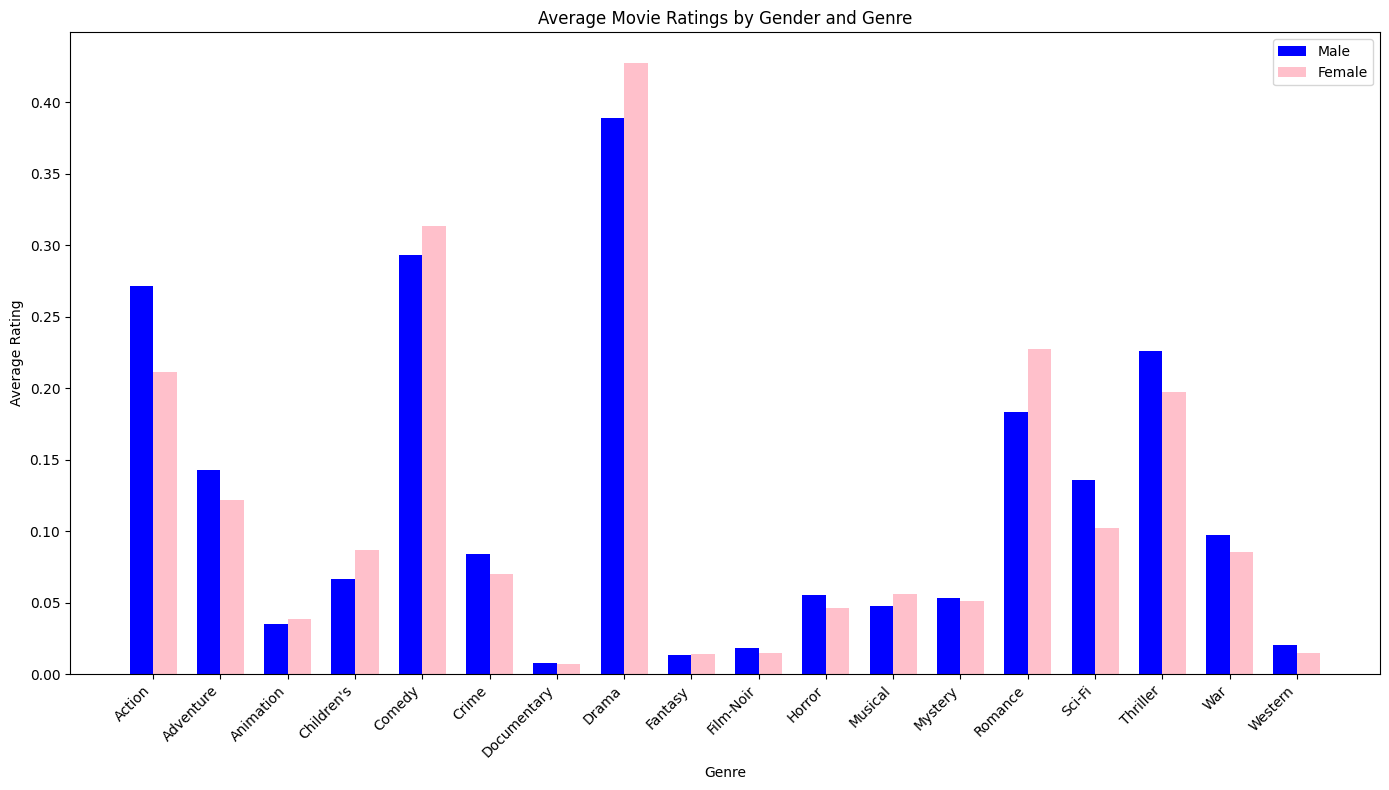

In [56]:
# significant differences in the preferences for different movie genres between male and female users

# Assuming genre columns are named 'Action', 'Adventure', etc.
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Group by gender and genre, calculate average rating with a suffix
grouped_data = merged_df.groupby(['gender'])[genre_columns].mean().reset_index()

# Add suffix to genre columns
grouped_data.columns = ['gender'] + [f'{col}_rating' for col in genre_columns]

# Extract male and female ratings
male_ratings = grouped_data[grouped_data['gender'] == 'M'].iloc[0, 1:].values
female_ratings = grouped_data[grouped_data['gender'] == 'F'].iloc[0, 1:].values

# Analyze differences
for genre in genre_columns:
    male_avg = grouped_data[grouped_data['gender'] == 'M'][f'{genre}_rating'].values[0]
    female_avg = grouped_data[grouped_data['gender'] == 'F'][f'{genre}_rating'].values[0]
    print(f"Genre: {genre}")
    print(f"Male Average Rating: {male_avg}")
    print(f"Female Average Rating: {female_avg}")
    print("-----------------------------------")


# Setting up the positions and width for the bars
x = np.arange(len(genre_columns))  # the label locations
width = 0.35  # the width of the bars

# Plotting the grouped bar chart
plt.figure(figsize=(14, 8))
plt.bar(x - width/2, male_ratings, width, label='Male', color='blue')
plt.bar(x + width/2, female_ratings, width, label='Female', color='pink')

# Adding titles and labels
plt.title('Average Movie Ratings by Gender and Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(x, genre_columns, rotation=45, ha='right')
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


Average number of ratings per male user: 0.009022353891731753
Average number of ratings per female user: 0.010606060606060607


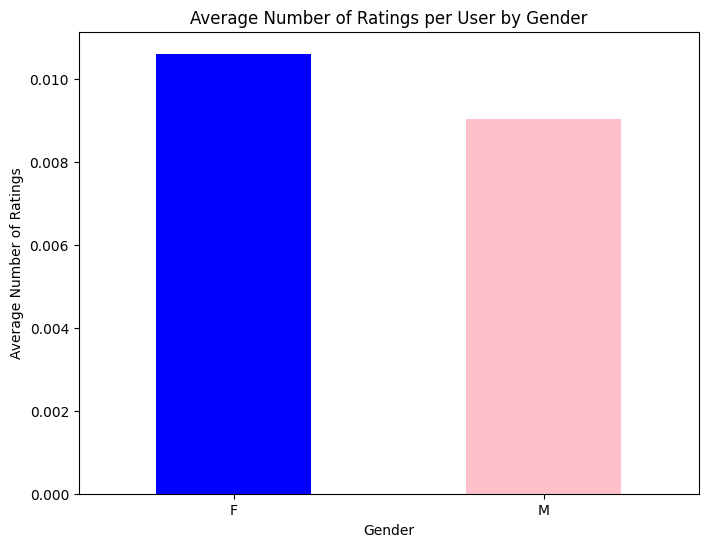

In [54]:
# Male or female users rate more movies on average

# Group by gender and count the number of ratings per user
user_ratings_by_gender = merged_df.groupby('gender')['user_id'].nunique()

# Calculate average number of ratings per user
avg_ratings_per_user = user_ratings_by_gender / merged_df['gender'].value_counts()

print("Average number of ratings per male user:", avg_ratings_per_user['M'])
print("Average number of ratings per female user:", avg_ratings_per_user['F'])
# Male users rate more as compared to female users
# Plotting the bar chart
plt.figure(figsize=(8, 6))
avg_ratings_per_user.plot(kind='bar', color=['blue', 'pink'])

# Adding titles and labels
plt.title('Average Number of Ratings per User by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Ratings')
plt.xticks(rotation=0)

# Display the graph
plt.show()

In [76]:
import pandas as pd

# Assuming the genre columns are in the DataFrame
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Group by movie and genre, calculate average rating
grouped_data = merged_df.groupby(['movie_id'] + genre_columns)['rating'].mean().reset_index()

# Find top-rated movie for each genre
top_rated_movies = {}
for genre in genre_columns:
    # Filter data for the current genre
    genre_data = grouped_data[grouped_data[genre] == 1]
    # Sort by rating and get the top movie
    top_movie = genre_data.sort_values(by='rating', ascending=False).head(1)
    # Add the top movie to the dictionary
    top_rated_movies[genre] = top_movie

# Concatenate the results into a single DataFrame
top_rated_movies_df = pd.concat(top_rated_movies.values()).reset_index(drop=True)

print(top_rated_movies_df)


    movie_id  Action  Adventure  Animation  Children's  Comedy  Crime  \
0         50       1          1          0           0       0      0   
1       1293       0          1          0           1       0      0   
2        408       0          0          1           0       1      0   
3       1293       0          1          0           1       0      0   
4       1500       0          0          0           0       1      0   
5       1122       0          0          0           0       0      1   
6        814       0          0          0           0       0      0   
7       1122       0          0          0           0       0      1   
8       1293       0          1          0           1       0      0   
9        657       0          0          0           0       0      0   
10       185       0          0          0           0       0      0   
11       132       0          1          0           1       0      0   
12       603       0          0          0         

Average Ratings by Age:
age
7     3.767442
10    3.387097
11    2.925926
13    3.470825
14    3.375000
        ...   
66    3.189189
68    3.500000
69    3.660256
70    3.517730
73    3.982143
Name: rating, Length: 61, dtype: float64


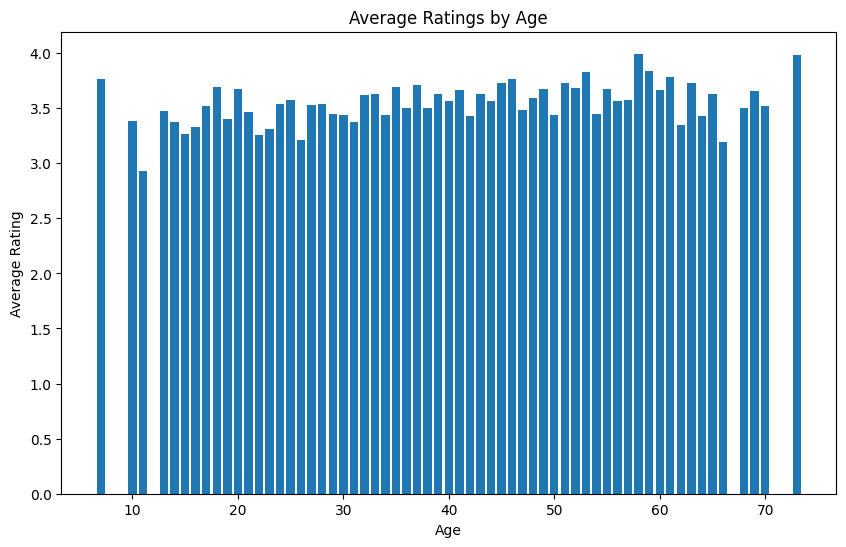

In [44]:
# Ratings across different user age groups?

# Group by age and calculate average rating
avg_ratings_by_age = merged_df.groupby('age')['rating'].mean()

# Analyze results
print("Average Ratings by Age:")
print(avg_ratings_by_age)

import matplotlib.pyplot as plt

# Plot average ratings by age
plt.figure(figsize=(10, 6))
plt.bar(avg_ratings_by_age.index, avg_ratings_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Age')
plt.show()


Average Ratings by Occupation:
occupation
administrator    3.635646
artist           3.653380
doctor           3.688889
educator         3.670621
engineer         3.541407
entertainment    3.441050
executive        3.349104
healthcare       2.896220
homemaker        3.301003
lawyer           3.735316
librarian        3.560781
marketing        3.485641
none             3.779134
other            3.552377
programmer       3.568260
retired          3.466750
salesman         3.582944
scientist        3.611273
student          3.515143
technician       3.532230
writer           3.375723
Name: rating, dtype: float64


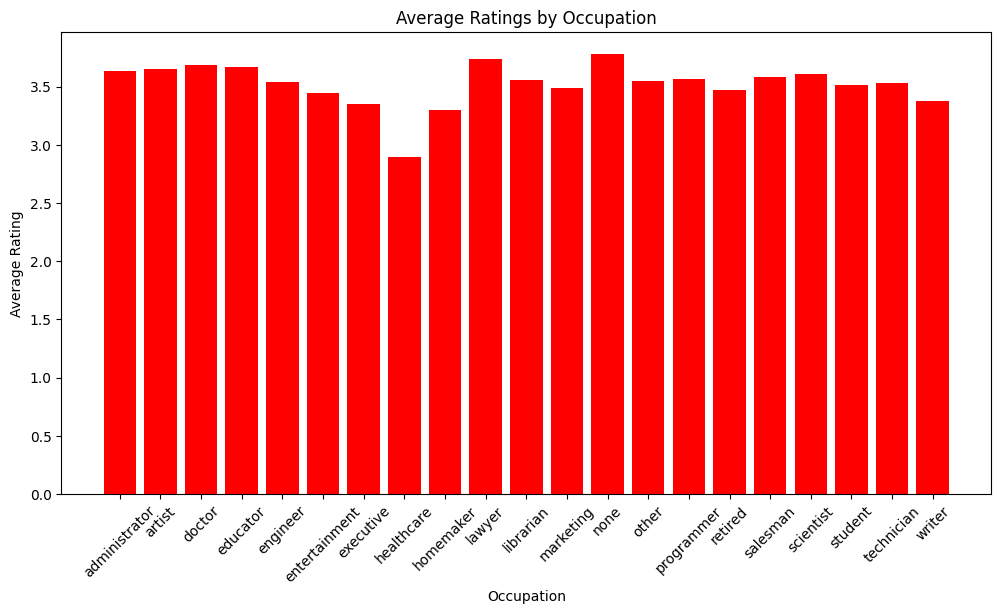

In [45]:
# Ratings  across different user occupations

# Group by occupation and calculate average rating
avg_ratings_by_occupation = merged_df.groupby('occupation')['rating'].mean()
print("\nAverage Ratings by Occupation:")
print(avg_ratings_by_occupation)


# Plot average ratings by occupation
plt.figure(figsize=(12, 6))
plt.bar(avg_ratings_by_occupation.index, avg_ratings_by_occupation.values,color="r")
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Occupation')
plt.xticks(rotation=45)
plt.show()


Genre: Action
    age    Action
0     7  0.418605
1    10  0.096774
2    11  0.481481
3    13  0.305835
4    14  0.223485
..  ...       ...
56   66  0.378378
57   68  0.130435
58   69  0.166667
59   70  0.163121
60   73  0.214286

[61 rows x 2 columns]
-----------------------------------
Genre: Adventure
    age  Adventure
0     7   0.325581
1    10   0.225806
2    11   0.296296
3    13   0.140845
4    14   0.178030
..  ...        ...
56   66   0.270270
57   68   0.054348
58   69   0.070513
59   70   0.056738
60   73   0.125000

[61 rows x 2 columns]
-----------------------------------
Genre: Animation
    age  Animation
0     7   0.023256
1    10   0.516129
2    11   0.074074
3    13   0.034205
4    14   0.068182
..  ...        ...
56   66   0.027027
57   68   0.010870
58   69   0.000000
59   70   0.021277
60   73   0.017857

[61 rows x 2 columns]
-----------------------------------
Genre: Children's
    age  Children's
0     7    0.116279
1    10    0.838710
2    11    0.148148
3    

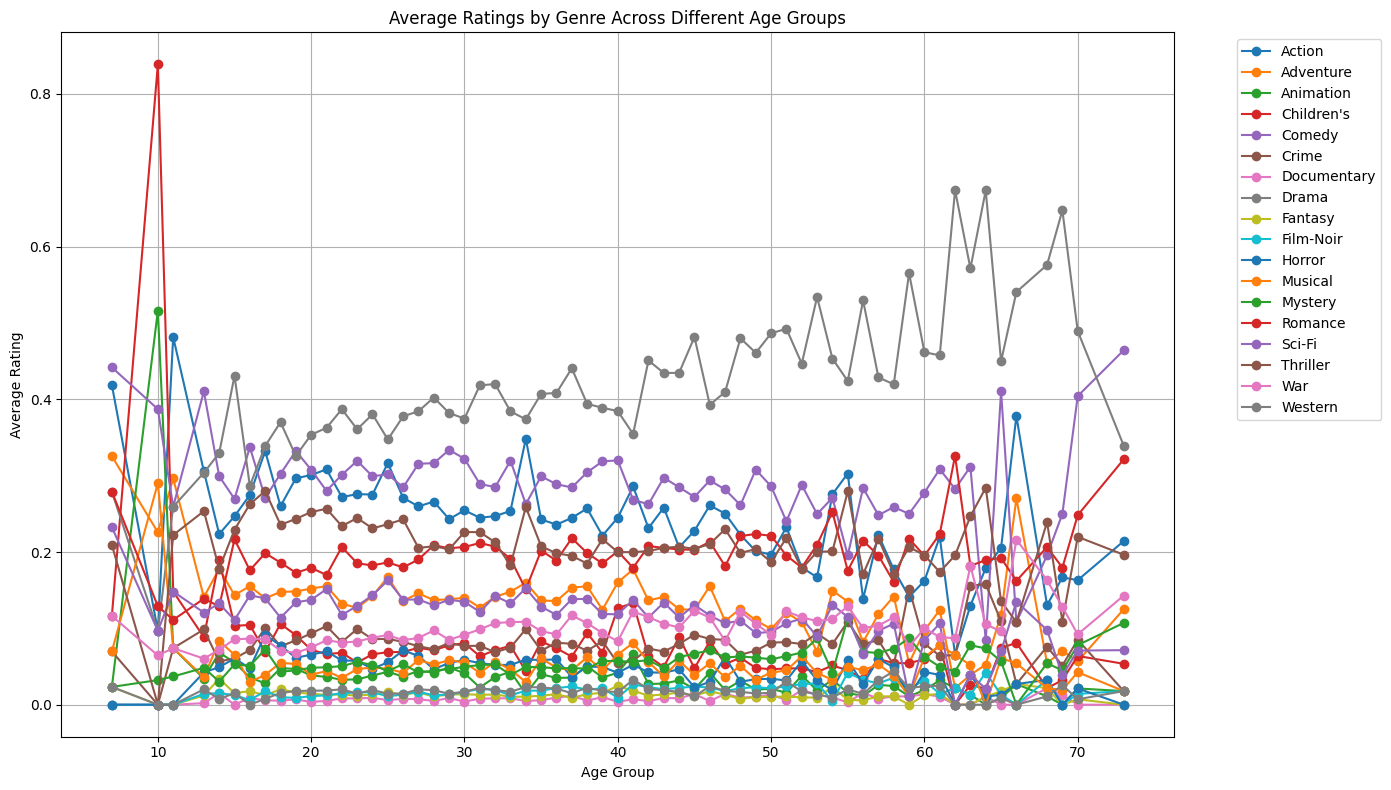

In [48]:
# Which genres are preferred by different age groups?

import pandas as pd

# Assuming the genre columns are in the DataFrame
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate the average rating for each genre within each age group
avg_ratings_by_age = merged_df.groupby('age')[genre_columns].mean().reset_index()

# Analyze differences
for genre in genre_columns:
    print(f"Genre: {genre}")
    print(avg_ratings_by_age[['age', genre]])
    print("-----------------------------------")

# Plotting
plt.figure(figsize=(14, 8))

for genre in genre_columns:
    plt.plot(avg_ratings_by_age['age'], avg_ratings_by_age[genre], marker='o', label=genre)

plt.title('Average Ratings by Genre Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Puts legend outside the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
unique_years = merged_df['time_period'].unique()
print("Unique years in the dataset:", unique_years)




Unique years in the dataset: [1997 1998]


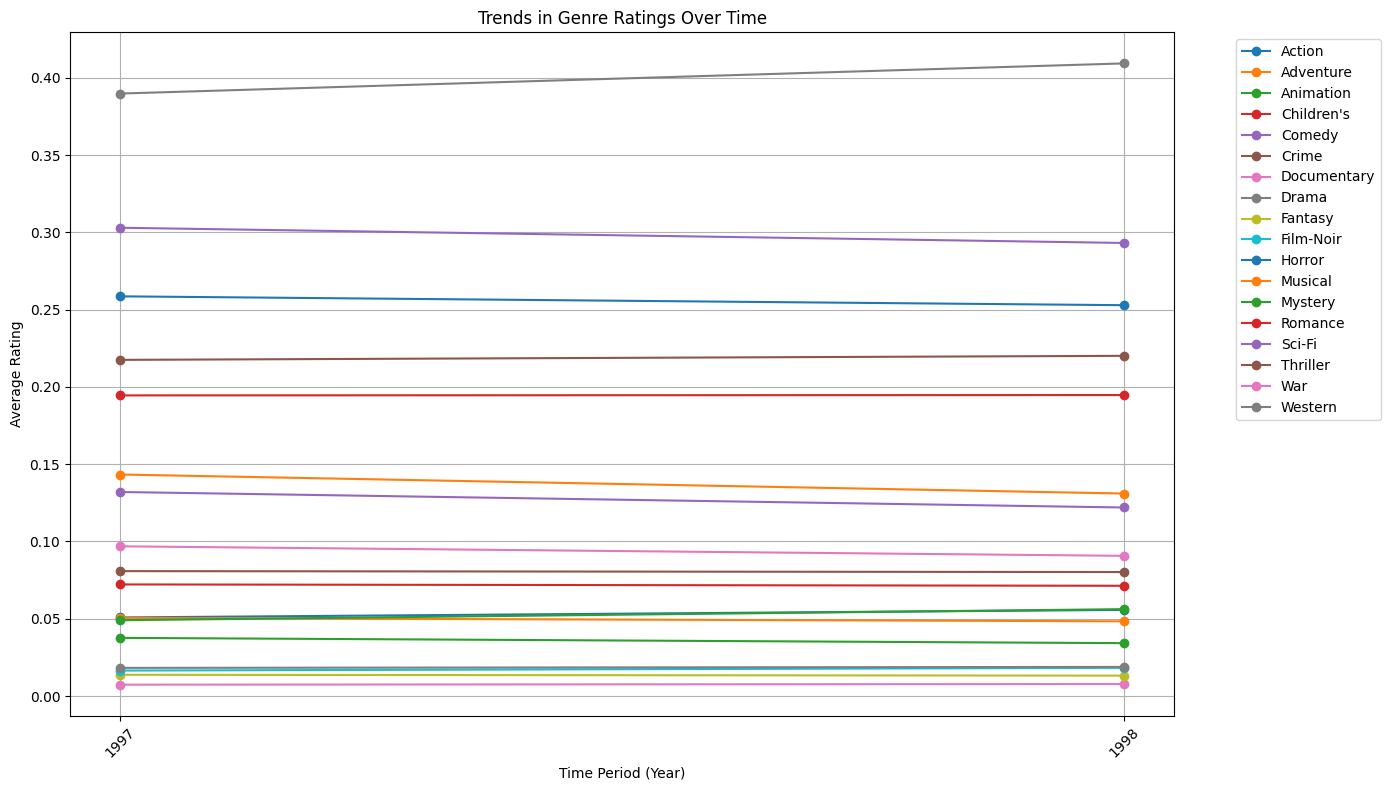

In [53]:
# How do user preferences evolve over time? Can we observe any shifts in genre popularity?


import pandas as pd
import matplotlib.pyplot as plt

# Assuming the timestamp column is in Unix time format
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

# Define a function to extract the desired time period (e.g., year)
def extract_time_period(timestamp):
    return timestamp.year  # You can modify this to extract month, week, etc.

# Extract the desired time period
merged_df['time_period'] = merged_df['timestamp'].apply(extract_time_period)

# Group by time period and genre, calculate average rating
avg_ratings_by_time_period = merged_df.groupby('time_period')[genre_columns].mean().reset_index()

# Plotting the trends
plt.figure(figsize=(14, 8))

for genre in genre_columns:
    plt.plot(avg_ratings_by_time_period['time_period'], avg_ratings_by_time_period[genre], marker='o', label=genre)

# Setting the x-axis labels to the distinct years
plt.xticks(avg_ratings_by_time_period['time_period'], rotation=45)  # Rotate for better readability

plt.title('Trends in Genre Ratings Over Time')
plt.xlabel('Time Period (Year)')
plt.ylabel('Average Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
